# Figure 6

In this notebook we'll generate Figure 6, a comparison of face shape sexual dimorphism between pops

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from Faces import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

In [2]:
#Folders
thispath      = os.getcwd()
projpath      = os.path.realpath("../..")
pathlandmarks = os.path.join(projpath, "Results", "Landmarks")
pathfacepca   = os.path.join(projpath, "DataBases", "FacePCA")
pathfig       = os.path.join(projpath, "Results", "Figures")

In [3]:
#Databases
os.chdir(pathfacepca)
facets = pd.read_csv("facets.csv", header = None)
os.chdir(pathlandmarks)
landmark_set = np.matrix(pd.read_csv("sex_decomp_landmarks.csv", header = None))

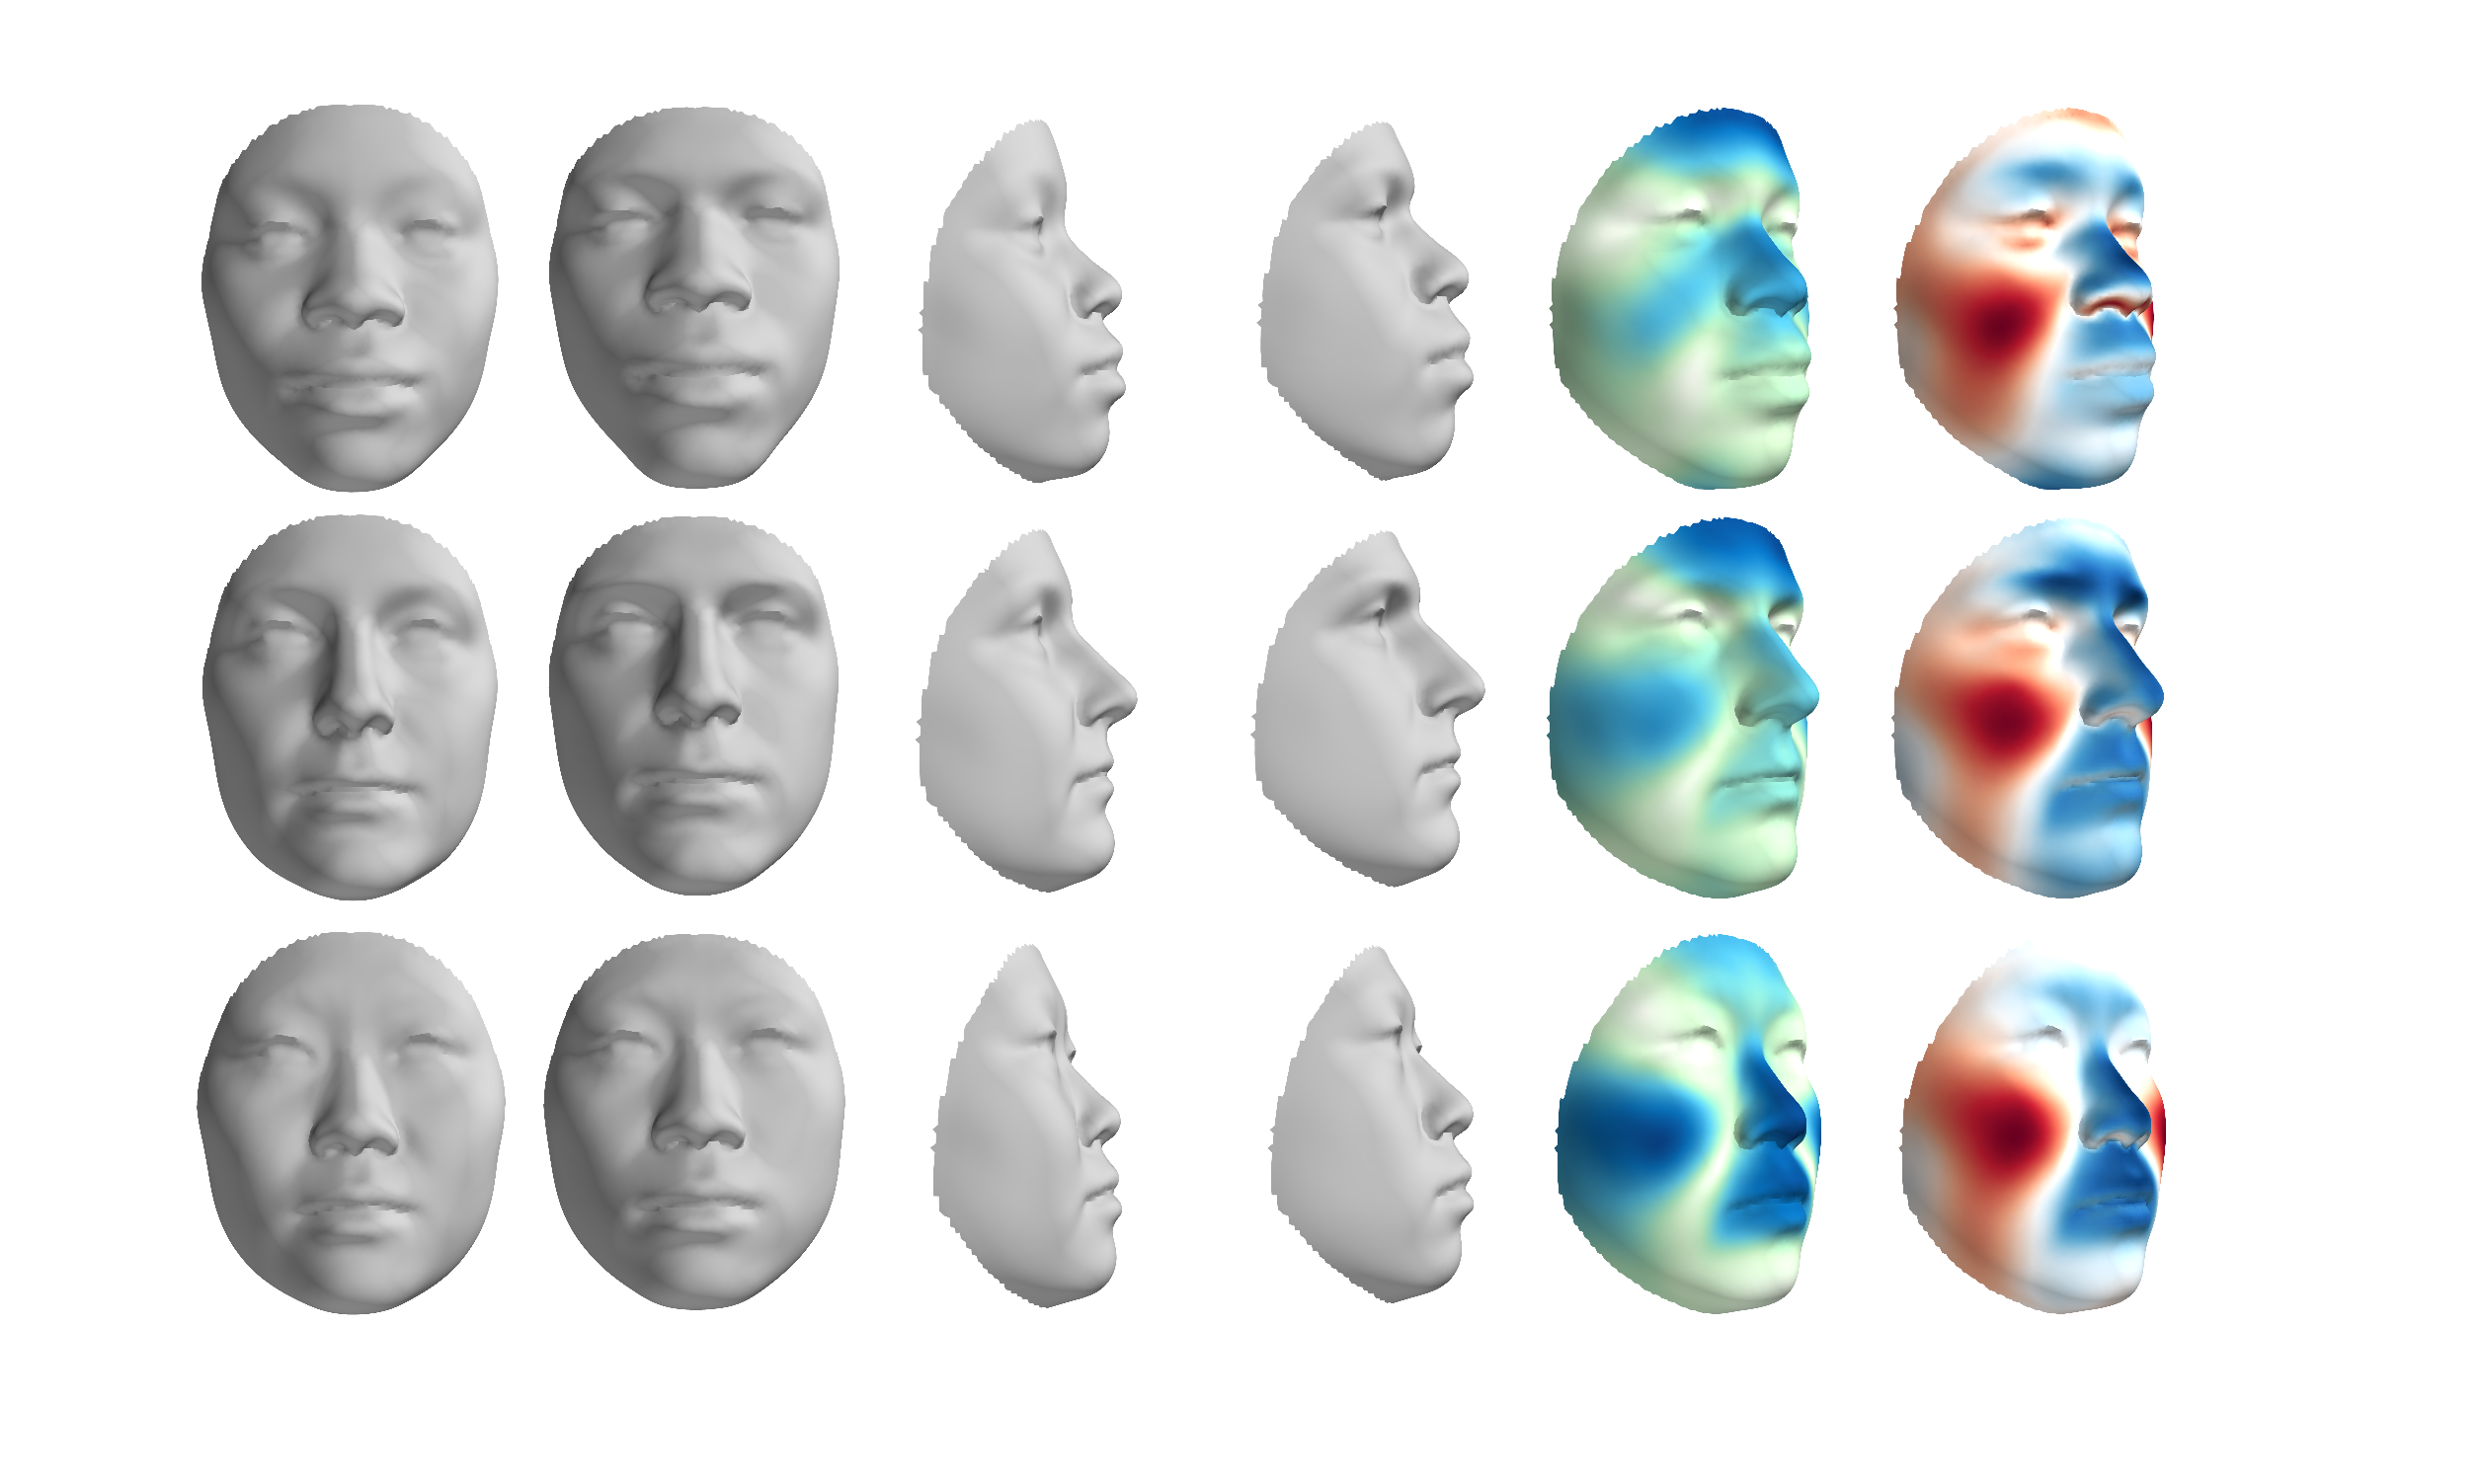

In [4]:
#Plot set of faces
nrow = landmark_set.shape[0]
fig = plt.figure(figsize=(10, 6), dpi=300)
ax  = fig.add_subplot(111)
ax.set_ylim([0.25,1])
ax.set_xlim([0,1])
plt.axis('off')

crow = 0.85
#Plot non-allometric sex dimorphism
for i in range(2, nrow, 6):
    face1 = FaceShape(landmark_set[i], facets)
    face2 = FaceShape(landmark_set[i + 1], facets)
    img1 = face1.take_screenshot(profile=0)
    img2 = face2.take_screenshot(profile=0)
    img3 = face1.take_screenshot(profile=2)
    img4 = face2.take_screenshot(profile=2)
    euc_dist  = face1.get_euc_dist(face2)
    nor_disp  = face1.get_normal_displacement(face2)
    avg   = (face1.landmarks + face2.landmarks) / 2
    avgface = FaceShape(avg, facets)
    img5 = avgface.take_screenshot(colormap=euc_dist, profile=1, colortype='GnBu')
    img6 = avgface.take_screenshot(colormap=nor_disp, profile=1, colortype='RdBu')
    
    image1 = OffsetImage(img1, zoom=0.08)
    image2 = OffsetImage(img2, zoom=0.08)
    image3 = OffsetImage(img3, zoom=0.08)
    image4 = OffsetImage(img4, zoom=0.08)
    image5 = OffsetImage(img5, zoom=0.08)
    image6 = OffsetImage(img6, zoom=0.08)
    
    a1 = AnnotationBbox(image1, (0.10, crow), xycoords='data', frameon=False)
    a2 = AnnotationBbox(image2, (0.25, crow), xycoords='data', frameon=False)
    a3 = AnnotationBbox(image3, (0.40, crow), xycoords='data', frameon=False)
    a4 = AnnotationBbox(image4, (0.55, crow), xycoords='data', frameon=False)
    a5 = AnnotationBbox(image5, (0.70, crow), xycoords='data', frameon=False)
    a6 = AnnotationBbox(image6, (0.85, crow), xycoords='data', frameon=False)
    
    ax.add_artist(a1)
    ax.add_artist(a2)
    ax.add_artist(a3)
    ax.add_artist(a4)
    ax.add_artist(a5)
    ax.add_artist(a6)
    
    crow = crow - 0.23
    
os.chdir(pathfig)
plt.savefig('Figure5.png', dpi=300, bbox_inches='tight')
plt.show()

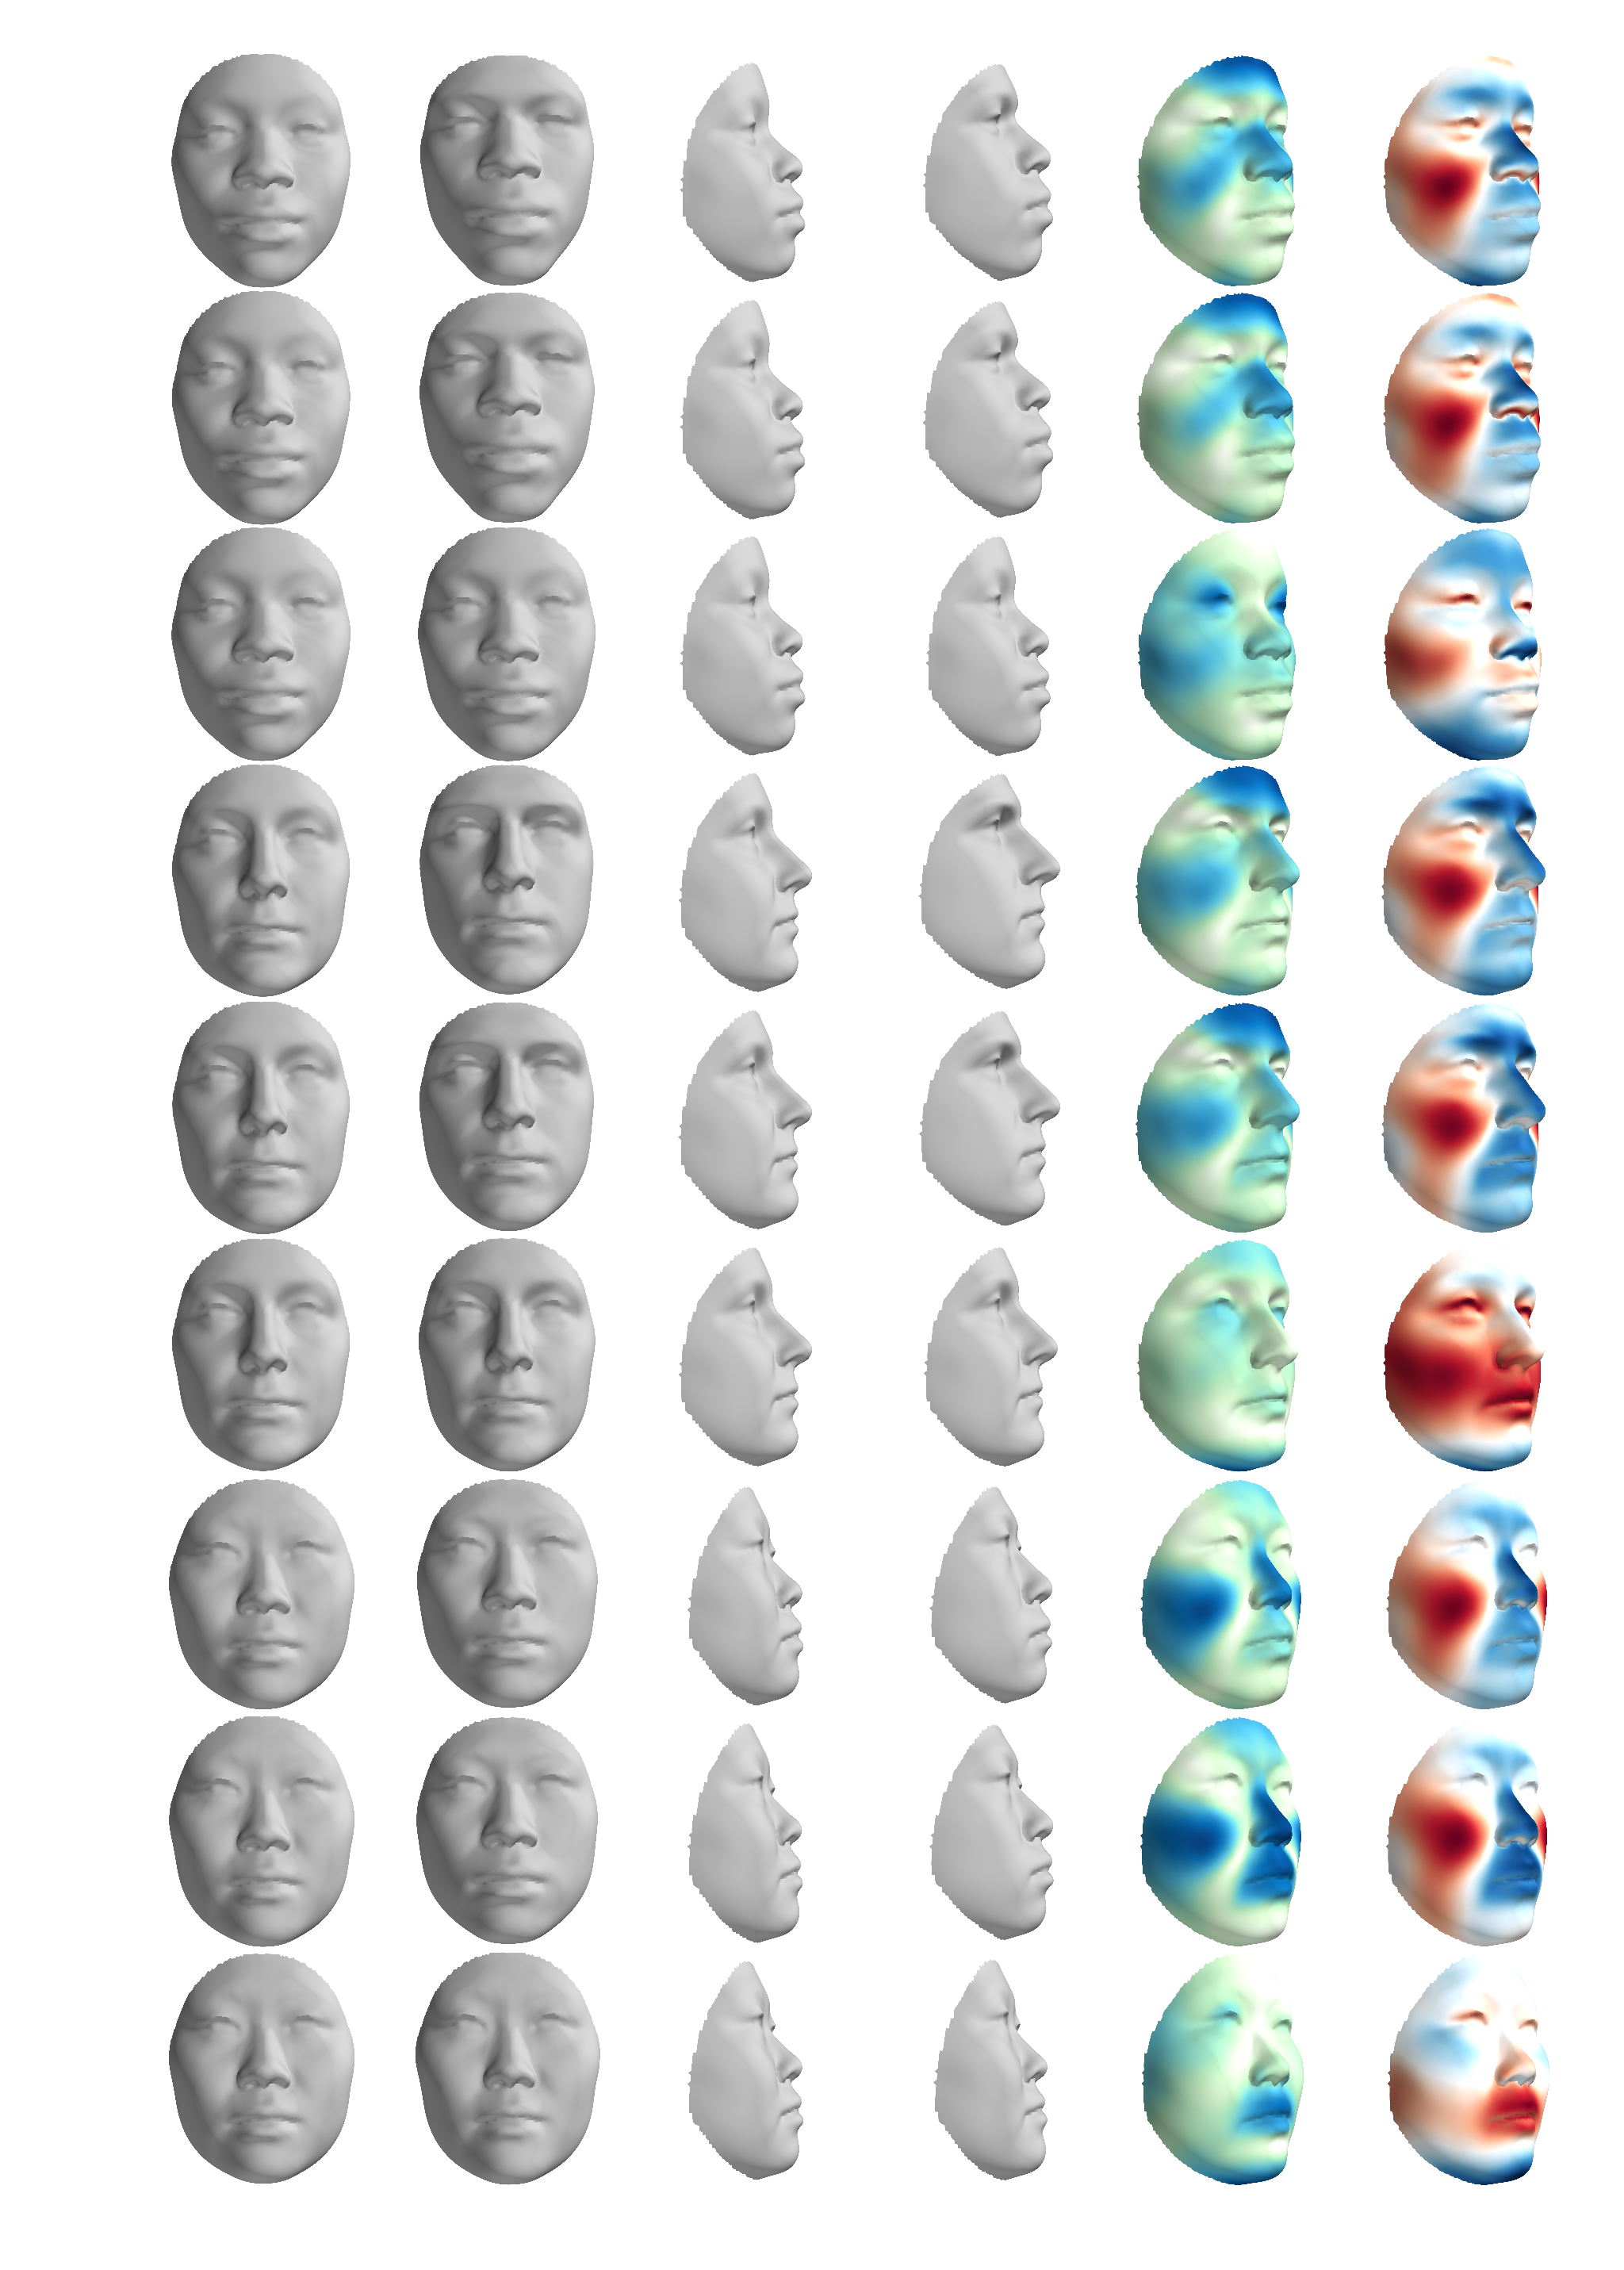

In [4]:
#Plot set of faces
fig = plt.figure(figsize=(8, 12), dpi=300)
ax  = fig.add_subplot(111)
ax.set_ylim([0,3])
ax.set_xlim([0,0.9])
plt.axis('off')

crow = 2.8
for i in range(0,18,2):
    index = 0
    face1 = FaceShape(landmark_set[i], facets)
    face2 = FaceShape(landmark_set[i + 1], facets)
    img1 = face1.take_screenshot(profile=0)
    img2 = face2.take_screenshot(profile=0)
    img3 = face1.take_screenshot(profile=2)
    img4 = face2.take_screenshot(profile=2)
    euc_dist  = face1.get_euc_dist(face2)
    nor_disp  = face1.get_normal_displacement(face2)
    avg   = (face1.landmarks + face2.landmarks) / 2
    avgface = FaceShape(avg, facets)
    img5 = avgface.take_screenshot(colormap=euc_dist, profile=1, colortype='GnBu')
    img6 = avgface.take_screenshot(colormap=nor_disp, profile=1, colortype='RdBu')
    
    image1 = OffsetImage(img1, zoom=0.06)
    image2 = OffsetImage(img2, zoom=0.06)
    image3 = OffsetImage(img3, zoom=0.06)
    image4 = OffsetImage(img4, zoom=0.06)
    image5 = OffsetImage(img5, zoom=0.06)
    image6 = OffsetImage(img6, zoom=0.06)
    
    a1 = AnnotationBbox(image1, (0.10, crow), xycoords='data', frameon=False)
    a2 = AnnotationBbox(image2, (0.25, crow), xycoords='data', frameon=False)
    a3 = AnnotationBbox(image3, (0.40, crow), xycoords='data', frameon=False)
    a4 = AnnotationBbox(image4, (0.55, crow), xycoords='data', frameon=False)
    a5 = AnnotationBbox(image5, (0.70, crow), xycoords='data', frameon=False)
    a6 = AnnotationBbox(image6, (0.85, crow), xycoords='data', frameon=False)

    
    ax.add_artist(a1)
    ax.add_artist(a2)
    ax.add_artist(a3)
    ax.add_artist(a4)
    ax.add_artist(a5)
    ax.add_artist(a6)
    
    crow = crow - 0.33
    
os.chdir(pathfig)
plt.savefig('FigureS2.png', dpi=300, bbox_inches='tight')
plt.show()